# Custom Indicator Example

In [3]:
import yfinance as yf

from mplchart.utils import get_info
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, OHLC, Volume, LinePlot


In [4]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 00:00:00-05:00 to 2024-12-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [5]:
from mplchart.model import Indicator
from mplchart.library import calc_ema

class DEMA(Indicator, same_scale=True):
    """Double Exponential Moving Average"""

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = self.get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [6]:
dema20 = DEMA(20)
dema20


DEMA(20)

In [7]:
get_info(dema20, "same_scale")


True

In [8]:
vars(dema20)


{'period': 20}

In [9]:


res = DEMA(20)(prices)
res.tail()

Date
2024-12-24 00:00:00-05:00    254.641551
2024-12-26 00:00:00-05:00    256.122847
2024-12-27 00:00:00-05:00    256.739485
2024-12-30 00:00:00-05:00    256.618868
2024-12-31 00:00:00-05:00    256.157150
Name: close, dtype: float64

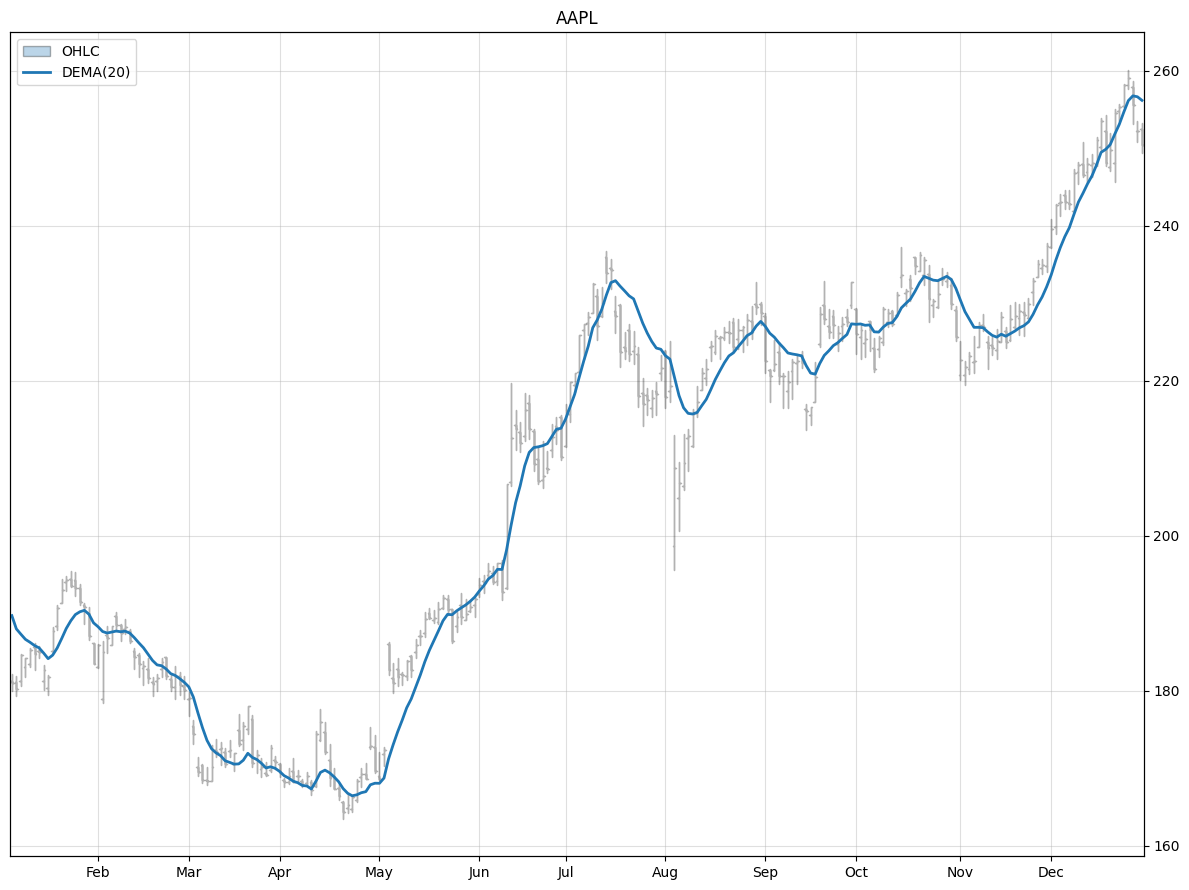

In [10]:
max_bars = 250

indicators = [
    OHLC(alpha=0.3),
    DEMA(20) | LinePlot(width=2),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
